<a href="https://colab.research.google.com/github/JamesPeralta/Auto-Garbage-Sorter/blob/master/GarbageClassifierTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras import layers
from keras import optimizers
import matplotlib.pyplot as plt
from keras.applications import VGG16

# Data Pre-processing 

In [0]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
test_data = '/content/drive/My Drive/CodeForChange - Garbage Classifier/James-Dataset/TRAIN'
os.chdir(test_data)
os.listdir()

['O', 'R', '.DS_Store']

In [0]:
os.chdir('/content/drive/My Drive/CodeForChange - Garbage Classifier/James-Dataset/TRAIN/R')
print(len(os.listdir()))

In [0]:
from keras.applications.vgg16 import preprocess_input

datagen = ImageDataGenerator()
batch_size = 2000

def extract_features():

    features = np.zeros(shape=(batch_size, 224, 224, 3))
    labels = np.zeros(shape=(batch_size))

    generator = datagen.flow_from_directory(
        test_data,
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='binary')

    inputs_batch, labels_batch = next(generator)
    inputs_batch = preprocess_input(inputs_batch, mode='tf')  
    
    return inputs_batch, labels_batch

In [0]:
X, y = extract_features()

Found 16052 images belonging to 2 classes.


In [0]:
print(X.shape)
print(y.shape)

(2000, 224, 224, 3)
(2000,)


In [0]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0.0: 780, 1.0: 1220}

# Creating the model

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
print(y_train.shape)

(1600,)


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Flatten
from tensorflow.keras.optimizers import RMSprop

In [0]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    # include_top=False to remove the top layer
# Freeze the base_model
for layer in base_model.layers:
    layer.trainable = False

# Actual model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
58892288/58889256 [==============================] - 1s 0us/step
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=4, batch_size=64, shuffle=True)

Train on 1600 samples, validate on 400 samples
Epoch 1/4
1600/1600 [==============================] - 999s 624ms/sample - loss: 0.5183 - acc: 0.7606 - val_loss: 0.3375 - val_acc: 0.8550
Epoch 2/4
1600/1600 [==============================] - 996s 623ms/sample - loss: 0.3338 - acc: 0.8619 - val_loss: 0.3664 - val_acc: 0.8450
Epoch 3/4
1600/1600 [==============================] - 996s 622ms/sample - loss: 0.2612 - acc: 0.8944 - val_loss: 0.2778 - val_acc: 0.8975
Epoch 4/4
1600/1600 [==============================] - 994s 621ms/sample - loss: 0.2156 - acc: 0.9169 - val_loss: 0.2879 - val_acc: 0.8950


# Evaluate the model

In [0]:
# Print classes
def print_classes(predictions):
  for i, pred in enumerate(predictions):
    garbage_class = ""
    if pred == [0]:
      garbage_class = "organic"
    else:
      garbage_class = "recycling"
    print("Image {} is {}".format(i + 1, garbage_class))


In [0]:
print_classes(model.predict_classes(X_valid[10:20]))

Image 1 is recycling
Image 2 is organic
Image 3 is organic
Image 4 is organic
Image 5 is organic
Image 6 is organic
Image 7 is recycling
Image 8 is recycling
Image 9 is organic
Image 10 is organic


# Save the model

In [0]:
from tensorflow.keras.models import load_model

model.save('/content/drive/My Drive/CodeForChange - Garbage Classifier/final.h5')

# Evaluate on real life image

In [0]:
real_data = '/content/drive/My Drive/CodeForChange - Garbage Classifier/James-Dataset/Real_Pics'
os.chdir(real_data)
os.listdir()

['4.jpg', '1.jpg', '2.jpg', '3.jpg']

In [0]:
import skimage.io
real_images = []
for img in os.listdir():
  after_read = skimage.io.imread(img)
  dim = (224, 224)
  resize_img = cv2.resize(after_read, dim)
  real_images.append(resize_img)

real_images = np.array(real_images)
real_images = preprocess_input(real_images, mode='tf')

In [0]:
real_images

In [0]:
print_classes(model.predict_classes(real_images))

Image 1 is recycling
Image 2 is organic
Image 3 is recycling
Image 4 is organic


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


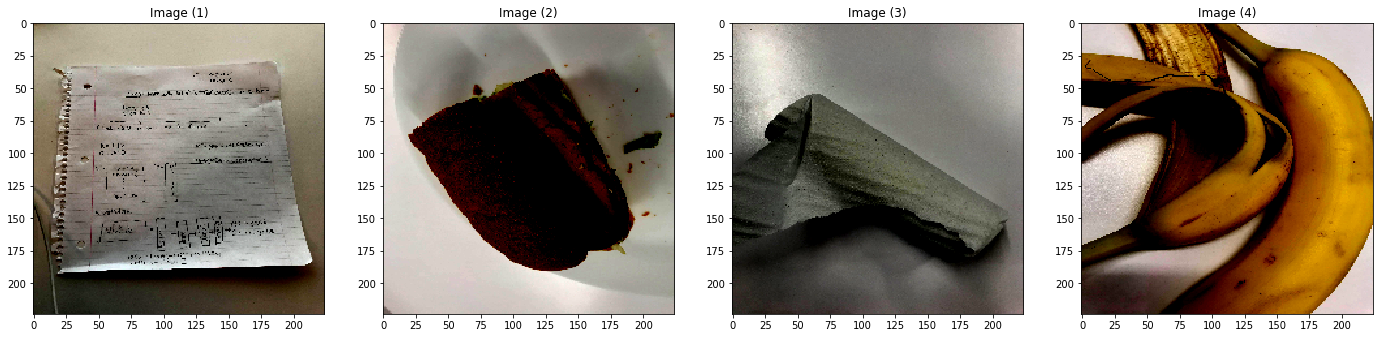

In [0]:
show_images(real_images)

# Showing images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


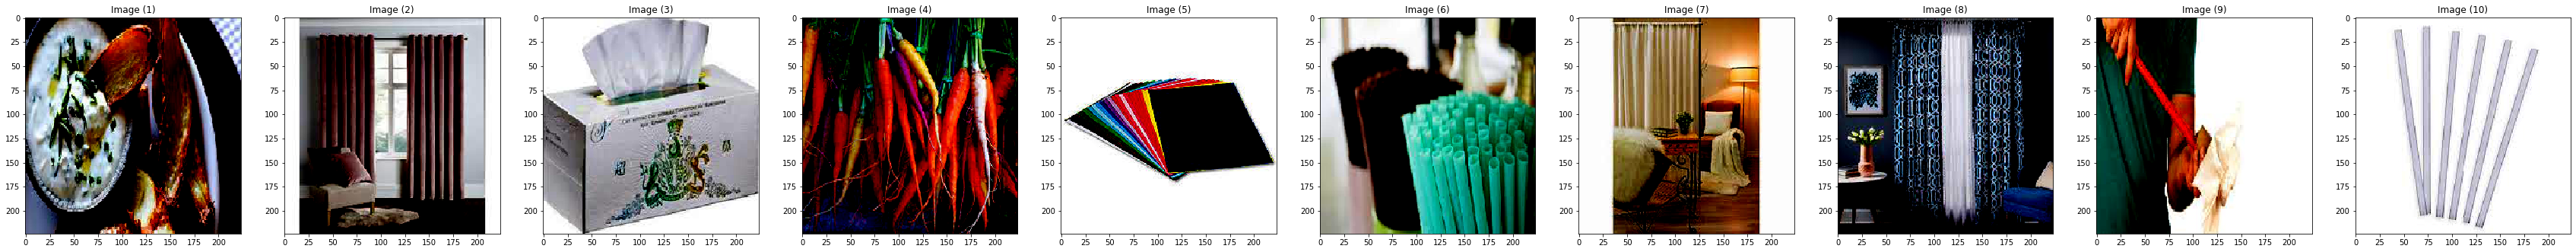

In [0]:
show_images(X, titles=None)

In [0]:
def show_images(images, cols=1, titles=None):
    """
    Display a list of images in a single figure with matplotlib.
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    cols (Default = 1): Number of columns in figure (number of rows is set to np.ceil(n_images/float(cols))).
    titles: List of titles corresponding to each image. Must have the same length as titles.
    """
    assert ((titles is None) or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1, n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images / float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()